# SAT5141 FALL 2023 - COURSE PROJECT | GROUP 22

BRAIN STROKE DETECTION USING MACHINE LEARNING ALGORITHMS.

## INSTALLING AND IMPORTING LIBRARIES AND DATA

In [1]:
#Installing the imbalance learn library to balance the imbalanced dataset
!pip install -U imbalanced-learn


In [39]:
#importing the important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedGroupKFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from imblearn.over_sampling import SMOTE
import tensorflow as tf


%matplotlib inline

In [3]:
#Uploading the files to colab
from google.colab import files
uploaded = files.upload()

Saving brain_stroke.csv to brain_stroke (1).csv


In [4]:
#importing the data from the csv file into the pandas data frame and looking at the head of the dataframe
df = pd.read_csv('brain_stroke.csv')
df.head(5)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1





## CREATING NEW DATAFRAME AFTER UPSAMPLING DATA

In [7]:
#Spliting the Dataset for upsampling
X = df.drop('stroke',axis = 1)
y = df['stroke']

In [8]:
#implementing the upsampling using Smote
smote = SMOTE(sampling_strategy='minority')
X_sm,y_sm = smote.fit_resample(X,y)


In [17]:
#Joing the dataframes using the concatinate method
df_sm = pd.concat([X_sm,y_sm], axis = 1)
df_sm.head(5)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,1,1,228.69,36.6,1,1
1,1,80.0,0,1,1,1,0,105.92,32.5,2,1
2,0,49.0,0,0,1,1,1,171.23,34.4,3,1
3,0,79.0,1,0,1,2,0,174.12,24.0,2,1
4,1,81.0,0,0,1,1,1,186.21,29.0,1,1


## EXPLORATORY DATA ANALYSIS

### EXPLORATORY DATA ANALYSIS ON ORIGINAL DATASET(NOT UPSAMPLED DATASET)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   int64  
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   int64  
 5   work_type          4981 non-null   int64  
 6   Residence_type     4981 non-null   int64  
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   int64  
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(8)
memory usage: 428.2 KB


<Figure size 800x600 with 0 Axes>

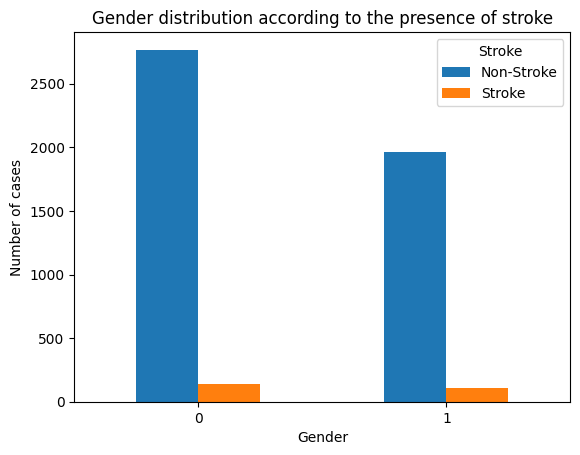

In [10]:
#Checking if the dataset is a balanced dataset or not using ploting

plt.figure(figsize=(8, 6))
gender_stroke = df.groupby(['gender', 'stroke']).size().unstack()
gender_stroke.plot(kind= 'bar')
plt.title('Gender distribution according to the presence of stroke')
plt.xlabel('Gender')
plt.ylabel('Number of cases')
plt.legend(title='Stroke', labels=['Non-Stroke', 'Stroke'])
plt.xticks(rotation=0)
plt.show()

In [11]:
# Categorical columns.
categorical_features = df[["gender", "hypertension", "heart_disease", "ever_married",
                       "work_type", "Residence_type", "smoking_status"]]


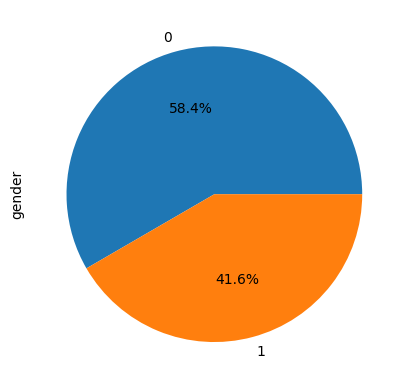

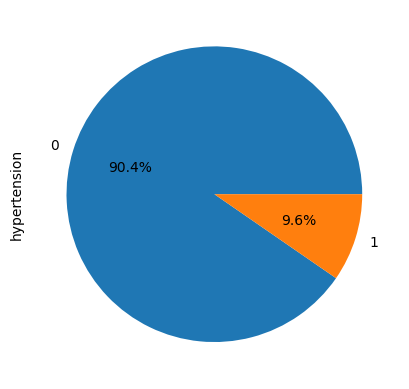

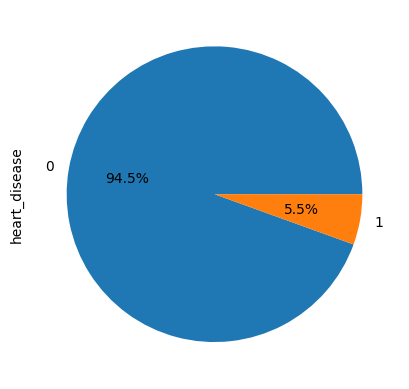

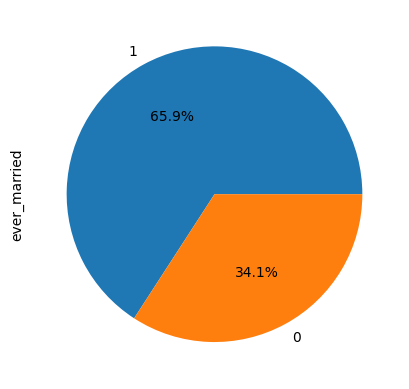

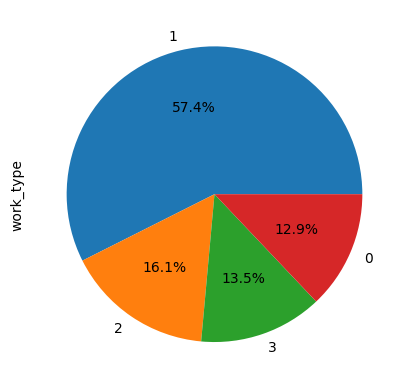

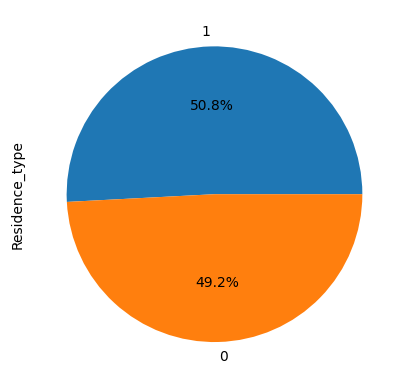

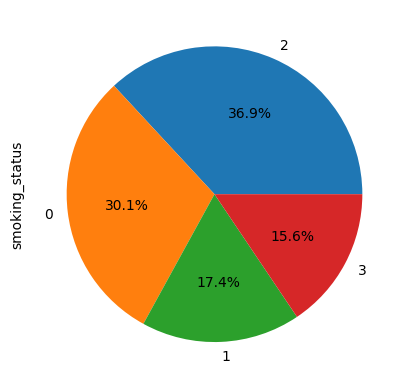

In [12]:
# The percentage of each element of the data
for feature in categorical_features:
    categorical_features[feature].value_counts().plot(kind = 'pie', autopct = '%1.1f%%')
    plt.show()

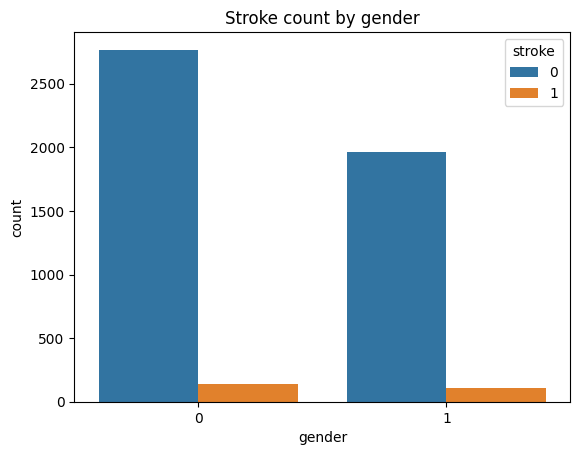

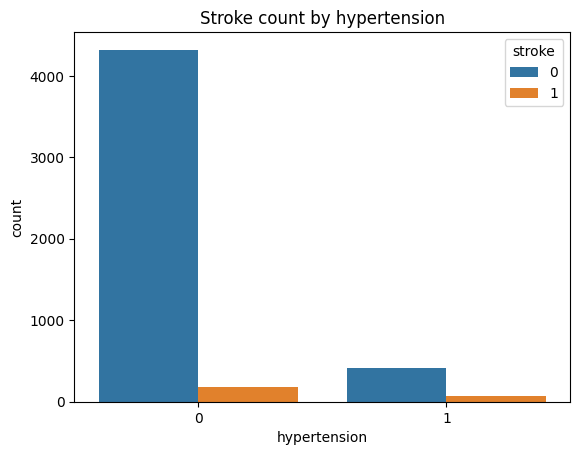

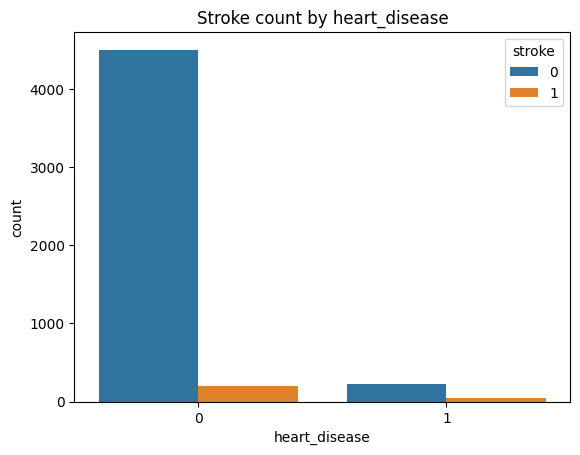

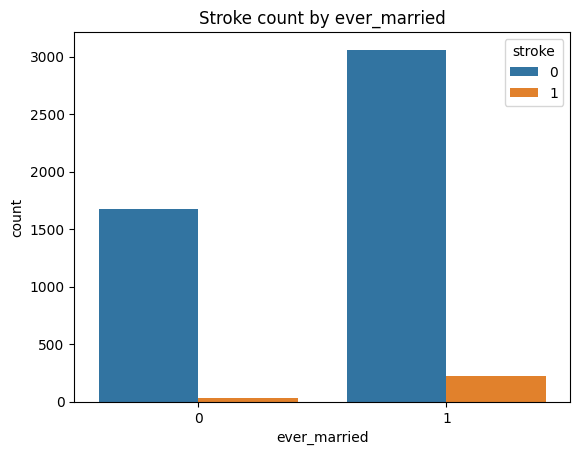

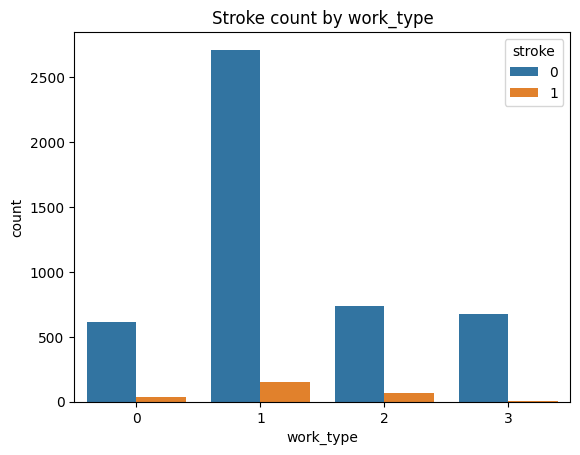

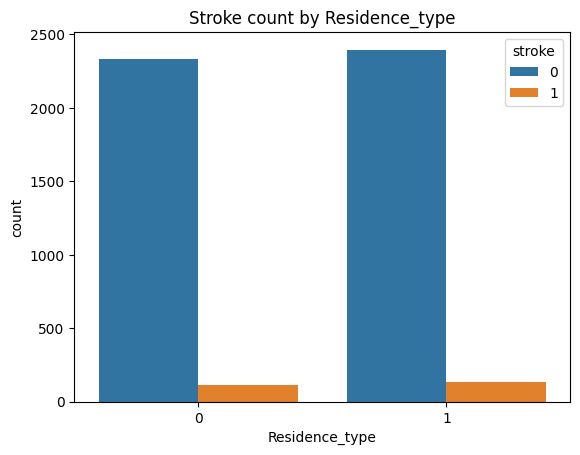

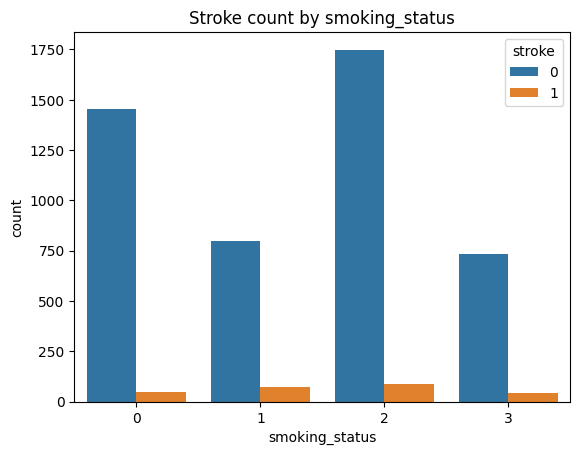

In [13]:
# Plot graphs that show the number who had stroke for categorical features.
for feature in categorical_features:
    title = "Stroke count by " + feature
    sns.countplot(data=df, x=feature, hue="stroke")
    plt.title(title)
    plt.show()

In [14]:
#Using the label encoder library to do the encoding for every categorical data
label_encoder = LabelEncoder()
df['work_type'] = label_encoder.fit_transform(df['work_type'])
df['Residence_type'] = label_encoder.fit_transform(df['Residence_type'])
df['smoking_status']= label_encoder.fit_transform(df['smoking_status'])
df['ever_married'] = label_encoder.fit_transform(df['ever_married'])
df['gender'] = label_encoder.fit_transform(df['gender'])

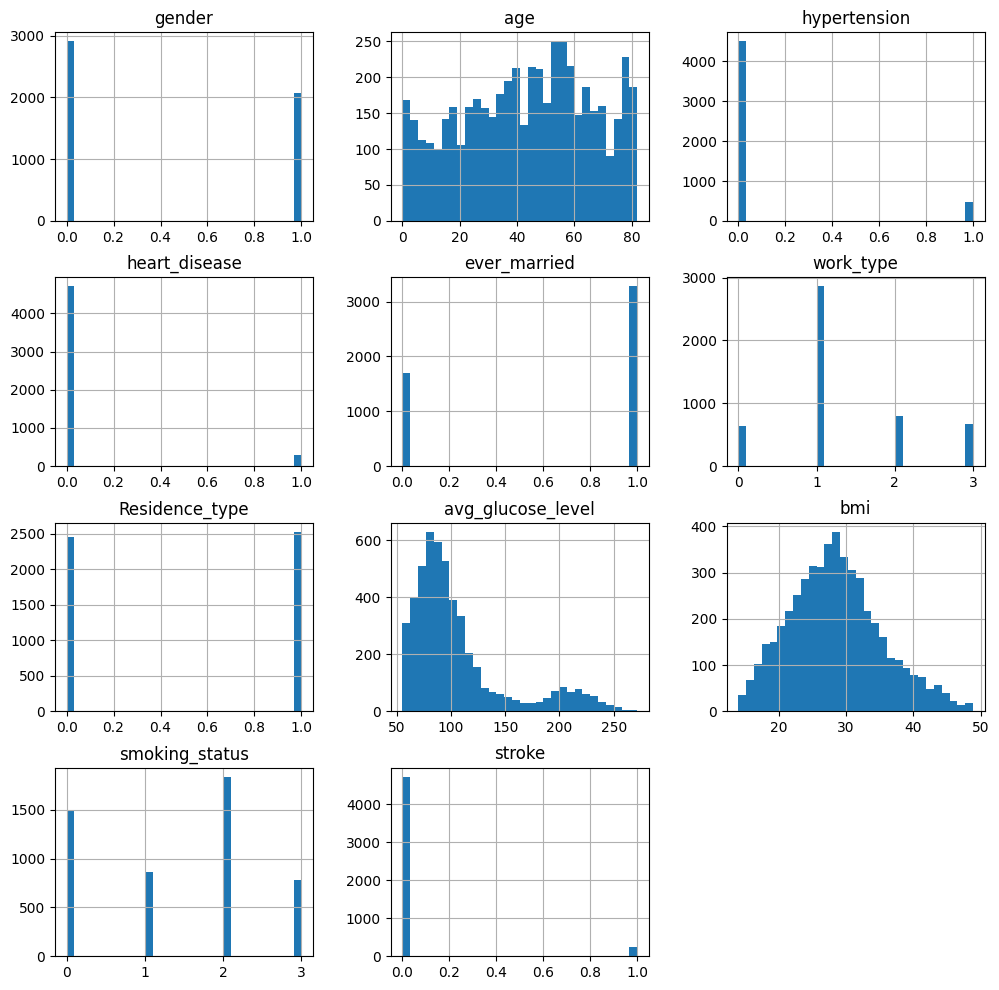

In [15]:
#Ploting the histogram plot for every attribute
df.hist(bins = 30,figsize=(12,12))
plt.show()

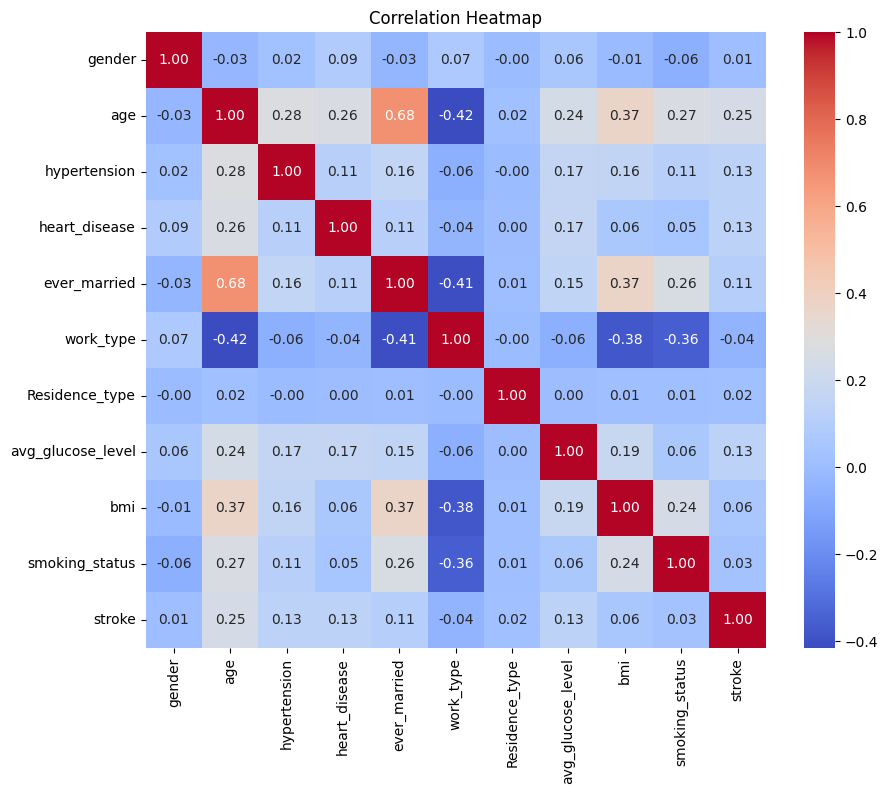

In [16]:
#Finding the correlation of the features
correlation_matrix = df.corr()

# Plot a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()




### EXPLORATORY DATA ANALYSIS ON UPSAMPLED DATASET


In [18]:
# Categorical columns.
categorical_features = df_sm[["gender", "hypertension", "heart_disease", "ever_married",
                       "work_type", "Residence_type", "smoking_status"]]


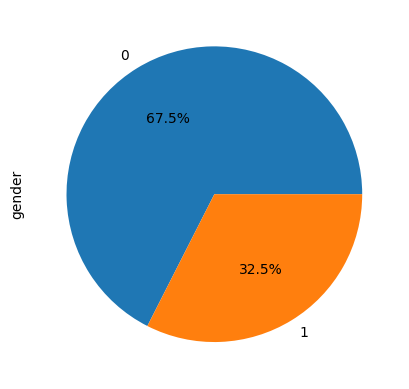

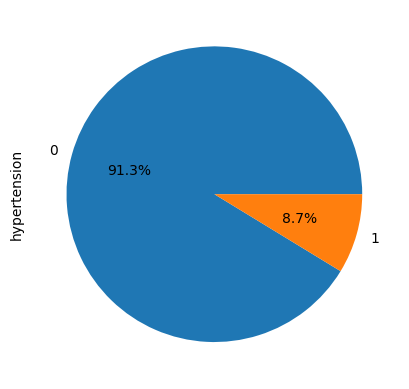

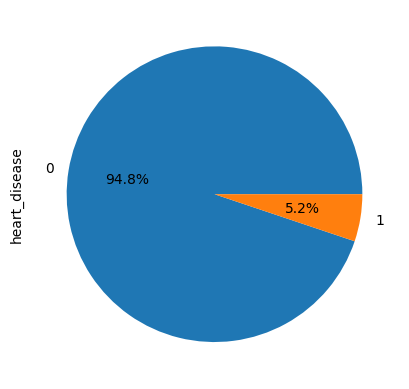

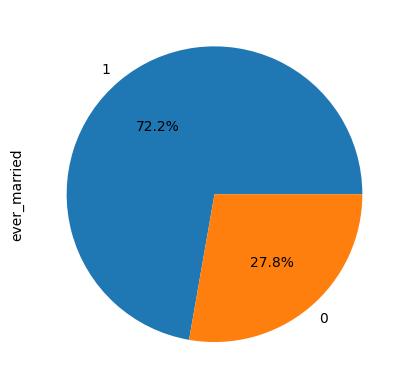

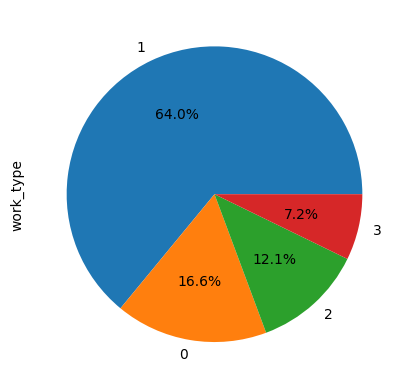

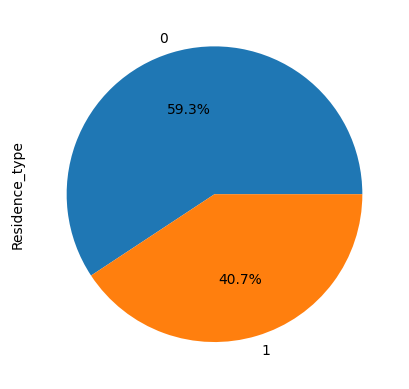

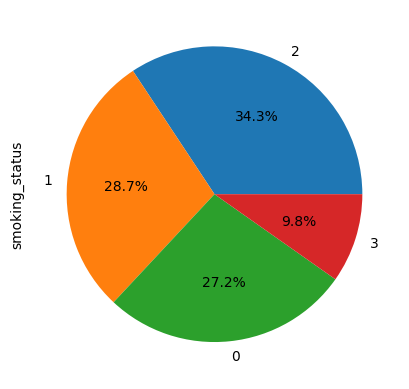

In [19]:
# The percentage of each element of the data
for feature in categorical_features:
    categorical_features[feature].value_counts().plot(kind = 'pie', autopct = '%1.1f%%')
    plt.show()

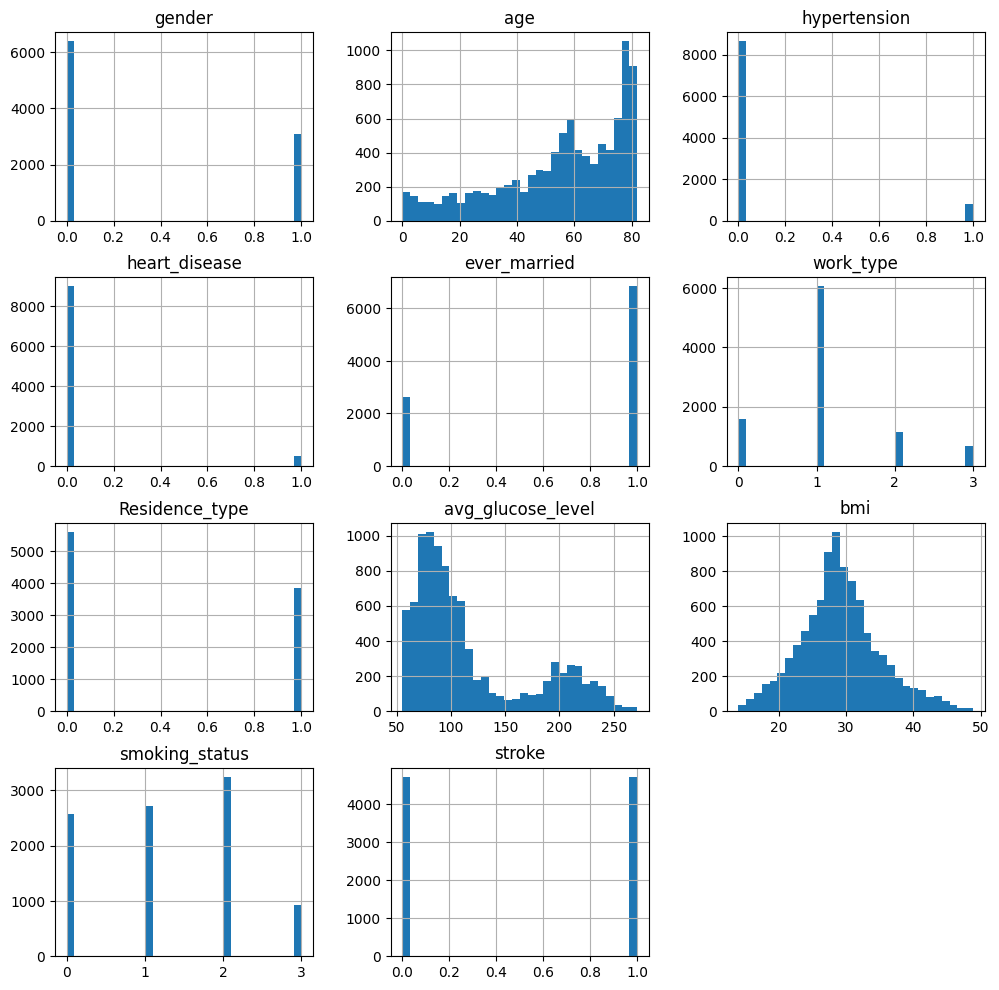

In [20]:
#ploting the histogram graphs
df_sm.hist(bins = 30, figsize=(12,12))
plt.show()

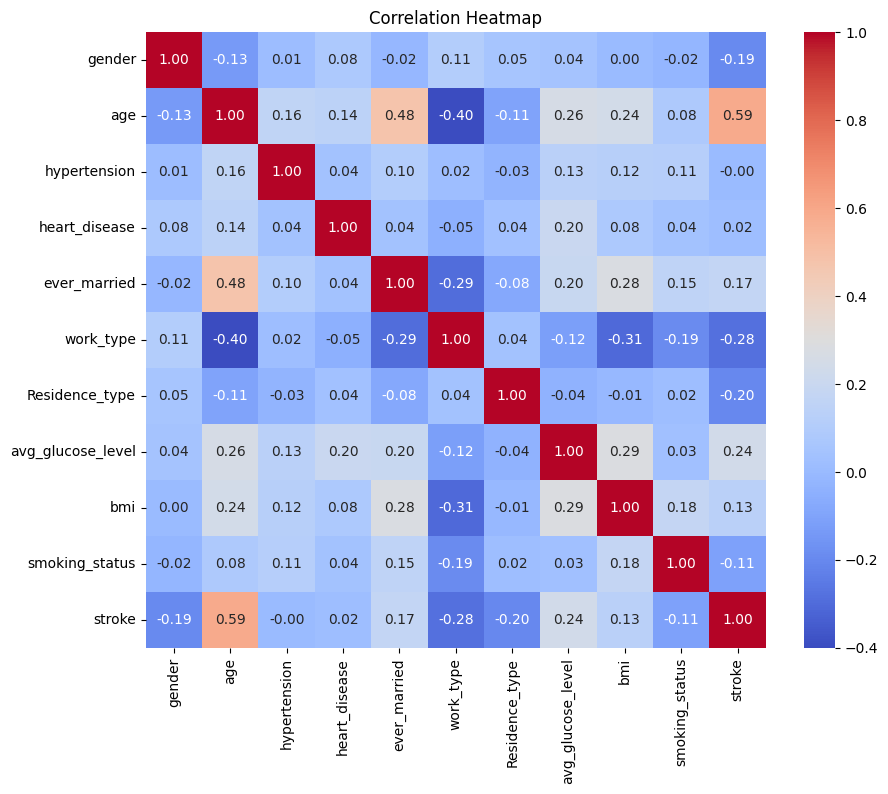

In [21]:
#Finding the correlation of the features
correlation_matrix = df_sm.corr()

# Plot a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

## MODEL TRAINING

In [22]:
#Using Kfold method to perform a 10 fold cross validation
#used for assessing the performance of the model

kf = KFold(n_splits=10)
kf

KFold(n_splits=10, random_state=None, shuffle=False)

In [51]:
#Creating lists to store the values of Accuracy for each model
KNN_train_acc = []
KNN_test_acc = []
RF_train_acc = []
RF_test_acc = []
LR_train_acc = []
LR_test_acc = []
DT_train_acc = []
DT_test_acc = []
SVM_train_acc = []
SVM_test_acc = []
LOR_train_acc = []
LOR_test_acc = []

### KNN MODEL

In [52]:
#KNN model making with 10 fold cross validation
for train_index, test_index in kf.split(df_sm):
  X_train, X_test, y_train, y_test = df_sm.iloc[train_index,:-1],df_sm.iloc[test_index,:-1],df_sm.loc[train_index,'stroke'],df_sm.loc[test_index,'stroke']
  knn_classifier = KNeighborsClassifier(n_neighbors=3)

  # Training the model
  knn_classifier.fit(X_train, y_train)

  # Make predictions on the test set
  y_pred_train = knn_classifier.predict(X_train)

  # Evaluate the model
  accuracy = accuracy_score(y_train, y_pred_train)
  print(f"KNN Training Set Accuracy: {accuracy*100:.2f}%")
  KNN_train_acc.append(accuracy)

  # Display classification report
  print("KNN Classification Report:")
  print(classification_report(y_train, y_pred_train))

  # Make predictions on the test set
  y_pred_test = knn_classifier.predict(X_test)

  # Evaluate the model
  accuracy = accuracy_score(y_test, y_pred_test)
  print(f"KNN Test Set Accuracy: {accuracy*100:.2f}%")
  KNN_test_acc.append(accuracy)

  # Display classification report
  print("KNN Classification Report:")
  print(classification_report(y_test, y_pred_test))


KNN Training Set Accuracy: 94.26%
KNN Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.88      0.94      3994
           1       0.91      0.99      0.95      4525

    accuracy                           0.94      8519
   macro avg       0.95      0.94      0.94      8519
weighted avg       0.95      0.94      0.94      8519

KNN Test Set Accuracy: 87.43%
KNN Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.84      0.91       739
           1       0.64      1.00      0.78       208

    accuracy                           0.87       947
   macro avg       0.82      0.92      0.85       947
weighted avg       0.92      0.87      0.88       947

KNN Training Set Accuracy: 94.58%
KNN Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.88      0.94      3786
           1       0.91      1.00      0.95      4733

   

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


KNN Training Set Accuracy: 94.45%
KNN Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.88      0.93      3786
           1       0.91      1.00      0.95      4733

    accuracy                           0.94      8519
   macro avg       0.95      0.94      0.94      8519
weighted avg       0.95      0.94      0.94      8519

KNN Test Set Accuracy: 80.68%
KNN Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.81      0.89       947
           1       0.00      0.00      0.00         0

    accuracy                           0.81       947
   macro avg       0.50      0.40      0.45       947
weighted avg       1.00      0.81      0.89       947



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


KNN Training Set Accuracy: 94.60%
KNN Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.88      0.94      3786
           1       0.91      1.00      0.95      4733

    accuracy                           0.95      8519
   macro avg       0.95      0.94      0.94      8519
weighted avg       0.95      0.95      0.95      8519

KNN Test Set Accuracy: 80.78%
KNN Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.81      0.89       947
           1       0.00      0.00      0.00         0

    accuracy                           0.81       947
   macro avg       0.50      0.40      0.45       947
weighted avg       1.00      0.81      0.89       947



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


KNN Training Set Accuracy: 94.68%
KNN Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.89      0.94      3786
           1       0.92      1.00      0.95      4733

    accuracy                           0.95      8519
   macro avg       0.95      0.94      0.95      8519
weighted avg       0.95      0.95      0.95      8519

KNN Test Set Accuracy: 81.20%
KNN Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.81      0.90       947
           1       0.00      0.00      0.00         0

    accuracy                           0.81       947
   macro avg       0.50      0.41      0.45       947
weighted avg       1.00      0.81      0.90       947



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


KNN Training Set Accuracy: 94.47%
KNN Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.90      0.95      4527
           1       0.90      0.99      0.94      3992

    accuracy                           0.94      8519
   macro avg       0.95      0.95      0.94      8519
weighted avg       0.95      0.94      0.94      8519

KNN Test Set Accuracy: 93.03%
KNN Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.76      0.83       206
           1       0.94      0.98      0.96       741

    accuracy                           0.93       947
   macro avg       0.92      0.87      0.89       947
weighted avg       0.93      0.93      0.93       947

KNN Training Set Accuracy: 94.26%
KNN Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.90      0.95      4733
           1       0.89      0.99      0.94      3787

   

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


KNN Training Set Accuracy: 94.50%
KNN Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.91      0.95      4733
           1       0.90      0.99      0.94      3787

    accuracy                           0.94      8520
   macro avg       0.94      0.95      0.94      8520
weighted avg       0.95      0.94      0.95      8520

KNN Test Set Accuracy: 97.15%
KNN Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.97      0.99       946

    accuracy                           0.97       946
   macro avg       0.50      0.49      0.49       946
weighted avg       1.00      0.97      0.99       946



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


KNN Training Set Accuracy: 94.31%
KNN Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.90      0.95      4733
           1       0.89      0.99      0.94      3787

    accuracy                           0.94      8520
   macro avg       0.94      0.95      0.94      8520
weighted avg       0.95      0.94      0.94      8520

KNN Test Set Accuracy: 97.46%
KNN Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.97      0.99       946

    accuracy                           0.97       946
   macro avg       0.50      0.49      0.49       946
weighted avg       1.00      0.97      0.99       946



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


KNN Training Set Accuracy: 94.21%
KNN Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.90      0.95      4733
           1       0.89      0.99      0.94      3787

    accuracy                           0.94      8520
   macro avg       0.94      0.95      0.94      8520
weighted avg       0.95      0.94      0.94      8520

KNN Test Set Accuracy: 98.10%
KNN Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.98      0.99       946

    accuracy                           0.98       946
   macro avg       0.50      0.49      0.50       946
weighted avg       1.00      0.98      0.99       946



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### RANDOM FOREST

In [53]:
#Random Forest model making with 10 fold cross validation
for train_index, test_index in kf.split(df_sm):
  X_train, X_test, y_train, y_test = df_sm.iloc[train_index,:-1],df_sm.iloc[test_index,:-1],df_sm.loc[train_index,'stroke'],df_sm.loc[test_index,'stroke']
  # Initialize the Random Forest classifier
  rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)  # You can adjust the number of trees (n_estimators)

  # Train the Random Forest classifier
  rf_classifier.fit(X_train, y_train)

  # Make predictions on the train set
  y_pred_train = rf_classifier.predict(X_train)

  # Evaluate the accuracy of the classifier
  accuracy = accuracy_score(y_train, y_pred_train)
  print(f"Training set Accuracy: {accuracy * 100:.2f}%")
  RF_train_acc.append(accuracy)

  # Make predictions on the test set
  y_pred_test = rf_classifier.predict(X_test)

  # Evaluate the accuracy of the classifier
  accuracy = accuracy_score(y_test, y_pred_test)
  print(f"Test set Accuracy: {accuracy * 100:.2f}%")
  RF_test_acc.append(accuracy)

  # Display classification report
  print("Random Forest Classification Report:")
  print(classification_report(y_test, y_pred_test))


Training set Accuracy: 100.00%
Test set Accuracy: 86.27%
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.93      0.91       739
           1       0.72      0.62      0.66       208

    accuracy                           0.86       947
   macro avg       0.81      0.77      0.79       947
weighted avg       0.86      0.86      0.86       947

Training set Accuracy: 100.00%
Test set Accuracy: 92.82%
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.93      0.96       947
           1       0.00      0.00      0.00         0

    accuracy                           0.93       947
   macro avg       0.50      0.46      0.48       947
weighted avg       1.00      0.93      0.96       947



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Training set Accuracy: 100.00%
Test set Accuracy: 90.81%
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.91      0.95       947
           1       0.00      0.00      0.00         0

    accuracy                           0.91       947
   macro avg       0.50      0.45      0.48       947
weighted avg       1.00      0.91      0.95       947



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Training set Accuracy: 100.00%
Test set Accuracy: 91.24%
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.91      0.95       947
           1       0.00      0.00      0.00         0

    accuracy                           0.91       947
   macro avg       0.50      0.46      0.48       947
weighted avg       1.00      0.91      0.95       947



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Training set Accuracy: 100.00%
Test set Accuracy: 91.55%
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.92      0.96       947
           1       0.00      0.00      0.00         0

    accuracy                           0.92       947
   macro avg       0.50      0.46      0.48       947
weighted avg       1.00      0.92      0.96       947



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Training set Accuracy: 100.00%
Test set Accuracy: 94.61%
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.90      0.88       206
           1       0.97      0.96      0.97       741

    accuracy                           0.95       947
   macro avg       0.91      0.93      0.92       947
weighted avg       0.95      0.95      0.95       947

Training set Accuracy: 100.00%
Test set Accuracy: 96.19%
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.96      0.98       946

    accuracy                           0.96       946
   macro avg       0.50      0.48      0.49       946
weighted avg       1.00      0.96      0.98       946



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Training set Accuracy: 100.00%
Test set Accuracy: 97.36%
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.97      0.99       946

    accuracy                           0.97       946
   macro avg       0.50      0.49      0.49       946
weighted avg       1.00      0.97      0.99       946



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Training set Accuracy: 100.00%
Test set Accuracy: 96.93%
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.97      0.98       946

    accuracy                           0.97       946
   macro avg       0.50      0.48      0.49       946
weighted avg       1.00      0.97      0.98       946



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Training set Accuracy: 100.00%
Test set Accuracy: 97.57%
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.98      0.99       946

    accuracy                           0.98       946
   macro avg       0.50      0.49      0.49       946
weighted avg       1.00      0.98      0.99       946



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### LINEAR REGRESSION

In [54]:
#Linear Regression model making with 10 fold cross validation
for train_index, test_index in kf.split(df_sm):
  X_train, X_test, y_train, y_test = df_sm.iloc[train_index,:-1],df_sm.iloc[test_index,:-1],df_sm.loc[train_index,'stroke'],df_sm.loc[test_index,'stroke']
  # Instantiate the Logistic Regression model
  model = LogisticRegression()

  # Train the model on the training data
  model.fit(X_train, y_train)

  # Make predictions on the train set
  y_pred_train = model.predict(X_train)

  # Evaluate the accuracy of the classifier
  accuracy = accuracy_score(y_train, y_pred_train)
  print(f"Training set Accuracy: {accuracy * 100:.2f}%")
  LR_train_acc.append(accuracy)

  # Predictions on the test set
  test_predictions = model.predict(X_test)

  # Evaluate the model on the test set
  test_accuracy = accuracy_score(y_test, test_predictions)
  print(f'Test Accuracy: {test_accuracy*100:.2f}%')
  LR_test_acc.append(accuracy)

  # Display classification report on the test set
  print('Classification Report on Test Set:')
  print(classification_report(y_test, test_predictions))

Training set Accuracy: 81.97%
Test Accuracy: 72.97%
Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.86      0.78      0.82       739
           1       0.41      0.56      0.48       208

    accuracy                           0.73       947
   macro avg       0.64      0.67      0.65       947
weighted avg       0.76      0.73      0.74       947



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Training set Accuracy: 81.24%
Test Accuracy: 76.14%
Classification Report on Test Set:
              precision    recall  f1-score   support

           0       1.00      0.76      0.86       947
           1       0.00      0.00      0.00         0

    accuracy                           0.76       947
   macro avg       0.50      0.38      0.43       947
weighted avg       1.00      0.76      0.86       947



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true s

Training set Accuracy: 81.31%
Test Accuracy: 74.66%
Classification Report on Test Set:
              precision    recall  f1-score   support

           0       1.00      0.75      0.85       947
           1       0.00      0.00      0.00         0

    accuracy                           0.75       947
   macro avg       0.50      0.37      0.43       947
weighted avg       1.00      0.75      0.85       947



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true s

Training set Accuracy: 81.61%
Test Accuracy: 75.29%
Classification Report on Test Set:
              precision    recall  f1-score   support

           0       1.00      0.75      0.86       947
           1       0.00      0.00      0.00         0

    accuracy                           0.75       947
   macro avg       0.50      0.38      0.43       947
weighted avg       1.00      0.75      0.86       947



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true s

Training set Accuracy: 81.44%
Test Accuracy: 76.24%
Classification Report on Test Set:
              precision    recall  f1-score   support

           0       1.00      0.76      0.87       947
           1       0.00      0.00      0.00         0

    accuracy                           0.76       947
   macro avg       0.50      0.38      0.43       947
weighted avg       1.00      0.76      0.87       947



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training set Accuracy: 80.60%
Test Accuracy: 79.83%
Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.52      0.78      0.63       206
           1       0.93      0.80      0.86       741

    accuracy                           0.80       947
   macro avg       0.73      0.79      0.74       947
weighted avg       0.84      0.80      0.81       947



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true s

Training set Accuracy: 80.70%
Test Accuracy: 78.86%
Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.79      0.88       946

    accuracy                           0.79       946
   macro avg       0.50      0.39      0.44       946
weighted avg       1.00      0.79      0.88       946



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true s

Training set Accuracy: 80.33%
Test Accuracy: 83.62%
Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.84      0.91       946

    accuracy                           0.84       946
   macro avg       0.50      0.42      0.46       946
weighted avg       1.00      0.84      0.91       946



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true s

Training set Accuracy: 80.97%
Test Accuracy: 78.12%
Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.78      0.88       946

    accuracy                           0.78       946
   macro avg       0.50      0.39      0.44       946
weighted avg       1.00      0.78      0.88       946

Training set Accuracy: 80.15%
Test Accuracy: 82.03%
Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.82      0.90       946

    accuracy                           0.82       946
   macro avg       0.50      0.41      0.45       946
weighted avg       1.00      0.82      0.90       946



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true s

### DECISION TREE

In [ ]:
#Decision Tree model making with 10 fold cross validation
for train_index, test_index in kf.split(df_sm):
  X_train, X_test, y_train, y_test = df_sm.iloc[train_index,:-1],df_sm.iloc[test_index,:-1],df_sm.loc[train_index,'stroke'],df_sm.loc[test_index,'stroke']
  # Instantiate the Decision Tree model
  model = DecisionTreeClassifier(random_state=42)

  # Train the model on the training data
  model.fit(X_train, y_train)

  # Make predictions on the train set
  y_pred_train = model.predict(X_train)

  # Evaluate the accuracy of the classifier
  accuracy = accuracy_score(y_train, y_pred_train)
  print(f"Training set Accuracy: {accuracy * 100:.2f}%")
  DT_train_acc.append(accuracy)

  # Predictions on the test set
  test_predictions = model.predict(X_test)

  # Evaluate the model on the test set
  test_accuracy = accuracy_score(y_test, test_predictions)
  print(f'Test Accuracy: {test_accuracy*100:.2f}%')
  DT_test_acc.append(accuracy)

  # Display classification report on the test set
  print('Classification Report on Test Set:')
  print(classification_report(y_test, test_predictions))


### SVM

In [56]:
#SVM model making with 10 fold cross validation
for train_index, test_index in kf.split(df_sm):
  X_train, X_test, y_train, y_test = df_sm.iloc[train_index,:-1],df_sm.iloc[test_index,:-1],df_sm.loc[train_index,'stroke'],df_sm.loc[test_index,'stroke']
  svm_classifier = SVC(kernel='linear', C=1.0)

  # Train the SVM classifier
  svm_classifier.fit(X_train, y_train)

  # Make predictions on the training set
  y_pred_train = svm_classifier.predict(X_train)

  # Evaluate the accuracy of the classifier
  accuracy = accuracy_score(y_train, y_pred_train)
  print(f"Accuracy with linear kernel for training set: {accuracy * 100:.2f}%")
  SVM_train_acc.append(accuracy)

  # Make predictions on the test set
  y_pred_test = svm_classifier.predict(X_test)

  # Evaluate the accuracy of the classifier
  accuracy = accuracy_score(y_test, y_pred_test)
  print(f"Accuracy with linear kernel for test set: {accuracy * 100:.2f}%")
  SVM_test_acc.append(accuracy)

  # Display classification report on the test set
  print('Classification Report on Test Set:')
  print(classification_report(y_test, y_pred_test))


Accuracy with linear kernel for training set: 81.81%
Accuracy with linear kernel for test set: 73.60%
Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.87      0.77      0.82       739
           1       0.43      0.60      0.50       208

    accuracy                           0.74       947
   macro avg       0.65      0.69      0.66       947
weighted avg       0.78      0.74      0.75       947

Accuracy with linear kernel for training set: 81.86%
Accuracy with linear kernel for test set: 74.97%
Classification Report on Test Set:
              precision    recall  f1-score   support

           0       1.00      0.75      0.86       947
           1       0.00      0.00      0.00         0

    accuracy                           0.75       947
   macro avg       0.50      0.37      0.43       947
weighted avg       1.00      0.75      0.86       947



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy with linear kernel for training set: 81.85%
Accuracy with linear kernel for test set: 74.02%
Classification Report on Test Set:
              precision    recall  f1-score   support

           0       1.00      0.74      0.85       947
           1       0.00      0.00      0.00         0

    accuracy                           0.74       947
   macro avg       0.50      0.37      0.43       947
weighted avg       1.00      0.74      0.85       947



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy with linear kernel for training set: 81.65%
Accuracy with linear kernel for test set: 74.02%
Classification Report on Test Set:
              precision    recall  f1-score   support

           0       1.00      0.74      0.85       947
           1       0.00      0.00      0.00         0

    accuracy                           0.74       947
   macro avg       0.50      0.37      0.43       947
weighted avg       1.00      0.74      0.85       947



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy with linear kernel for training set: 81.41%
Accuracy with linear kernel for test set: 75.71%
Classification Report on Test Set:
              precision    recall  f1-score   support

           0       1.00      0.76      0.86       947
           1       0.00      0.00      0.00         0

    accuracy                           0.76       947
   macro avg       0.50      0.38      0.43       947
weighted avg       1.00      0.76      0.86       947



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy with linear kernel for training set: 80.88%
Accuracy with linear kernel for test set: 80.15%
Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.53      0.77      0.63       206
           1       0.93      0.81      0.86       741

    accuracy                           0.80       947
   macro avg       0.73      0.79      0.75       947
weighted avg       0.84      0.80      0.81       947

Accuracy with linear kernel for training set: 80.48%
Accuracy with linear kernel for test set: 79.18%
Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.79      0.88       946

    accuracy                           0.79       946
   macro avg       0.50      0.40      0.44       946
weighted avg       1.00      0.79      0.88       946



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy with linear kernel for training set: 80.06%
Accuracy with linear kernel for test set: 84.36%
Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.84      0.92       946

    accuracy                           0.84       946
   macro avg       0.50      0.42      0.46       946
weighted avg       1.00      0.84      0.92       946



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy with linear kernel for training set: 80.55%
Accuracy with linear kernel for test set: 79.70%
Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.80      0.89       946

    accuracy                           0.80       946
   macro avg       0.50      0.40      0.44       946
weighted avg       1.00      0.80      0.89       946



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy with linear kernel for training set: 80.20%
Accuracy with linear kernel for test set: 82.66%
Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.83      0.91       946

    accuracy                           0.83       946
   macro avg       0.50      0.41      0.45       946
weighted avg       1.00      0.83      0.91       946



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### LOGISTIC REGRESSION

In [57]:
#Logistic Regression model making with 10 fold cross validation
for train_index, test_index in kf.split(df_sm):
  X_train, X_test, y_train, y_test = df_sm.iloc[train_index,:-1],df_sm.iloc[test_index,:-1],df_sm.loc[train_index,'stroke'],df_sm.loc[test_index,'stroke']

  # logistic regression model
  model = LogisticRegression()

  # Train the model
  model.fit(X_train, y_train)

  # Make predictions on the train set
  y_pred_train = model.predict(X_train)

  # Evaluate the accuracy of the classifier
  accuracy = accuracy_score(y_train, y_pred_train)
  print(f"Training set Accuracy: {accuracy * 100:.2f}%")
  LOR_train_acc.append(accuracy)

  # Predictions on the test set
  test_predictions = model.predict(X_test)

  # Evaluate the model on the test set
  test_accuracy = accuracy_score(y_test, test_predictions)
  print(f'Test Accuracy: {test_accuracy*100:.2f}%')
  LOR_test_acc.append(accuracy)

  # Display classification report on the test set
  print('Classification Report on Test Set:')
  print(classification_report(y_test, test_predictions))


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Training set Accuracy: 81.97%
Test Accuracy: 72.97%
Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.86      0.78      0.82       739
           1       0.41      0.56      0.48       208

    accuracy                           0.73       947
   macro avg       0.64      0.67      0.65       947
weighted avg       0.76      0.73      0.74       947

Training set Accuracy: 81.24%
Test Accuracy: 76.14%
Classification Report on Test Set:
              precision    recall  f1-score   support

           0       1.00      0.76      0.86       947
           1       0.00      0.00      0.00         0

    accuracy                           0.76       947
   macro avg       0.50      0.38      0.43       947
weighted avg       1.00      0.76      0.86       947



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true s

Training set Accuracy: 81.31%
Test Accuracy: 74.66%
Classification Report on Test Set:
              precision    recall  f1-score   support

           0       1.00      0.75      0.85       947
           1       0.00      0.00      0.00         0

    accuracy                           0.75       947
   macro avg       0.50      0.37      0.43       947
weighted avg       1.00      0.75      0.85       947

Training set Accuracy: 81.61%
Test Accuracy: 75.29%
Classification Report on Test Set:
              precision    recall  f1-score   support

           0       1.00      0.75      0.86       947
           1       0.00      0.00      0.00         0

    accuracy                           0.75       947
   macro avg       0.50      0.38      0.43       947
weighted avg       1.00      0.75      0.86       947



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true s

Training set Accuracy: 81.44%
Test Accuracy: 76.24%
Classification Report on Test Set:
              precision    recall  f1-score   support

           0       1.00      0.76      0.87       947
           1       0.00      0.00      0.00         0

    accuracy                           0.76       947
   macro avg       0.50      0.38      0.43       947
weighted avg       1.00      0.76      0.87       947

Training set Accuracy: 80.60%
Test Accuracy: 79.83%
Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.52      0.78      0.63       206
           1       0.93      0.80      0.86       741

    accuracy                           0.80       947
   macro avg       0.73      0.79      0.74       947
weighted avg       0.84      0.80      0.81       947



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true s

Training set Accuracy: 80.70%
Test Accuracy: 78.86%
Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.79      0.88       946

    accuracy                           0.79       946
   macro avg       0.50      0.39      0.44       946
weighted avg       1.00      0.79      0.88       946

Training set Accuracy: 80.33%
Test Accuracy: 83.62%
Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.84      0.91       946

    accuracy                           0.84       946
   macro avg       0.50      0.42      0.46       946
weighted avg       1.00      0.84      0.91       946



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true s

Training set Accuracy: 80.97%
Test Accuracy: 78.12%
Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.78      0.88       946

    accuracy                           0.78       946
   macro avg       0.50      0.39      0.44       946
weighted avg       1.00      0.78      0.88       946

Training set Accuracy: 80.15%
Test Accuracy: 82.03%
Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.82      0.90       946

    accuracy                           0.82       946
   macro avg       0.50      0.41      0.45       946
weighted avg       1.00      0.82      0.90       946



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true s

## MODEL SELECTION

In [58]:
#Printing the accuracy for each model
KNN_Test_acc = np.mean(KNN_test_acc)
print('KNN Test Accuracy: ', KNN_Test_acc*100)
KNN_Train_acc = np.mean(KNN_train_acc)
print('KNN Training Accuracy: ',KNN_Train_acc*100)
RF_Test_acc = np.mean(RF_test_acc)
print('RF Test Accuracy: ', RF_Test_acc*100)
RF_Train_acc = np.mean(RF_train_acc)
print('RF Training Accuracy: ',RF_Train_acc*100)
LR_Test_acc = np.mean(LR_test_acc)
print('LR Test Accuracy: ', LR_Test_acc*100)
LR_Train_acc = np.mean(LR_train_acc)
print('LR Training Accuracy: ',LR_Train_acc*100)
DT_Test_acc = np.mean(DT_test_acc)
print('DT Test Accuracy: ', DT_Test_acc*100)
DT_Train_acc = np.mean(DT_train_acc)
print('DT Training Accuracy: ',DT_Train_acc*100)
SVM_Test_acc = np.mean(SVM_test_acc)
print('SVM Test Accuracy: ', SVM_Test_acc*100)
SVM_Train_acc = np.mean(SVM_train_acc)
print('SVM Training Accuracy: ',SVM_Train_acc*100)
LOR_Test_acc = np.mean(LOR_test_acc)
print('LOR Test Accuracy: ', LOR_Test_acc*100)
LOR_Train_acc = np.mean(LOR_train_acc)
print('LOR Training Accuracy: ',LOR_Train_acc*100)

KNN Test Accuracy:  89.55537794883585
KNN Training Accuracy:  94.43153800921111
RF Test Accuracy:  93.5362254454369
RF Training Accuracy:  100.0
LR Test Accuracy:  81.03272497212804
LR Training Accuracy:  81.03272497212804
DT Test Accuracy:  100.0
DT Training Accuracy:  100.0
SVM Test Accuracy:  77.83800406759077
SVM Training Accuracy:  81.07499364855248
LOR Test Accuracy:  81.03272497212804
LOR Training Accuracy:  81.03272497212804


In [62]:
values1 = [KNN_Train_acc,RF_Train_acc]
values1

[0.9443153800921111, 1.0]

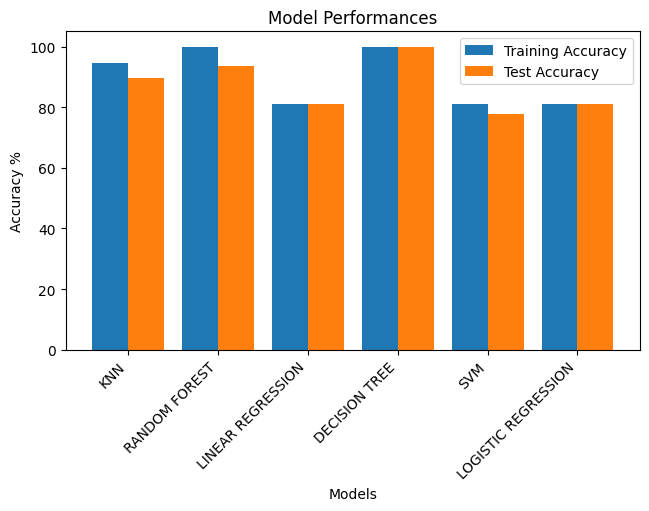

In [69]:
#Ploting the accuracy of each model to determine the performance
models = ['KNN', 'RANDOM FOREST', 'LINEAR REGRESSION', 'DECISION TREE', 'SVM', 'LOGISTIC REGRESSION']
Training_Accuracy = [KNN_Train_acc,RF_Train_acc,LR_Train_acc,DT_Train_acc,SVM_Train_acc,LOR_Train_acc]
Test_Accuracy = [KNN_Test_acc,RF_Test_acc,LR_Test_acc,DT_Test_acc,SVM_Test_acc,LOR_Test_acc]
Training_Accuracy = np.array(Training_Accuracy)*100
Test_Accuracy = np.array(Test_Accuracy)*100

# Calculate the position for each category on the x-axis
x = np.arange(len(models))

# Plotting the bar plots for both lists
plt.bar(x - 0.2, Training_Accuracy, width=0.4, label='Training Accuracy')
plt.bar(x + 0.2, Test_Accuracy, width=0.4, label='Test Accuracy')
# Rotate x-labels for better readability
plt.xticks(x, models, rotation=45, ha='right')

# Adjust layout for better spacing
plt.tight_layout()
# Adding labels, title, and legend
plt.xlabel('Models')
plt.ylabel('Accuracy %')
plt.title('Model Performances')
plt.xticks(x, models)
plt.legend()

# Display the plot
plt.show()

## Conclusion

Comparing the Accuracy the Random Forest Model perfroms the best compared to any other model which we have used.

Test Accuracy: 93.53%
Macro Avg F1 value: 0.92 which is highest compared to any model which we have used.